## Credit Card Default Detection 

### Problem Definition

Given certain parameters (noted under <a href="#Features">Features</a>) predict the chances of a client defaulting on his/her credit card payments.

### Data

Data has been collected from <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients"> here</a>.

### Evaluation

What defines success for our Prediction Model:

At 80% accuracy we would consider our model as successful. 

### Features 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:<ol>
<li>Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br> <span id="features"></span>
<li>Gender (1 = male; 2 = female).<br>
<li>Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
<li>Marital status (1 = married; 2 = single; 3 = others).<br>
<li>Age (year).<br>
<li>History of past payment (History of Past Payment): We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
<li>Amount of bill statement (NT dollar)(BILL_AMT) X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.<br>
<li>Amount of previous payment (NT dollar)(Pay_Amt 1). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Importing libraries

In [204]:
!pip install seaborn

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [212]:
#Importing Dataset
dataset = pd.read_csv("default cc rec.csv")
perf_dataset = dataset.drop('ID',axis=1)
perf_dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [213]:
#Exploring data and it's data type
perf_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Let's check if there are missing values

In [214]:
perf_dataset.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Reassuring if there are any missing values by checking the counts

In [215]:
perf_dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Exploring trends

In [216]:
gender_dist = pd.crosstab(perf_dataset['default payment next month'], perf_dataset['SEX'])
gender_dist

SEX,1,2
default payment next month,,
0,9015,14349
1,2873,3763


Sex 1 = Male ; 2 = Femle;

Default payment next month 0 = No ; 1 = Yes

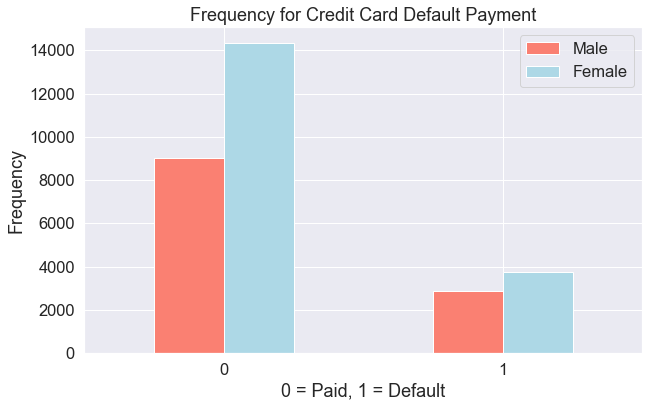

In [217]:
gender_dist.plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Frequency for Credit Card Default Payment")
plt.xlabel("0 = Paid, 1 = Default")
plt.ylabel("Frequency")
plt.legend(["Male", "Female"]);
plt.xticks(rotation=0);

In [218]:
perf_dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Renaming the Y row

In [219]:
perf_dataset = perf_dataset.rename(columns={'default payment next month': 'target'})
perf_dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [220]:
#average of past payment statuses 
# the lower the average the better. As -1 is better than 4. -1 means paid duly and 4 means paid after 4 months.
average_payment_status =((perf_dataset.PAY_0 +perf_dataset.PAY_2+perf_dataset.PAY_3+perf_dataset.PAY_4+perf_dataset.PAY_5)/6)
perf_dataset['average past payments'] = average_payment_status
perf_dataset['average past payments']

0        0.000000
1        0.166667
2        0.000000
3        0.000000
4       -0.333333
           ...   
29995    0.000000
29996   -0.666667
29997    1.333333
29998    0.000000
29999    0.000000
Name: average past payments, Length: 30000, dtype: float64

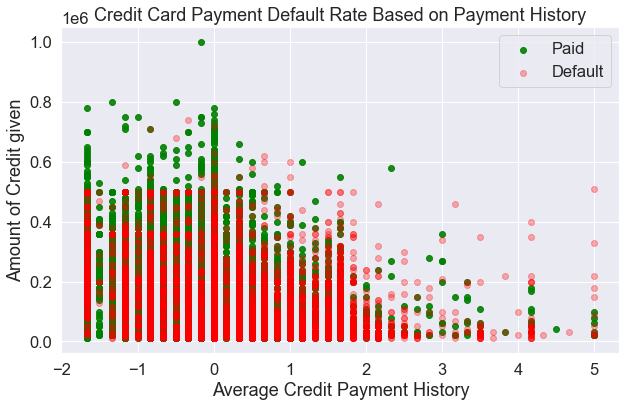

In [221]:
# Create another figure
plt.figure(figsize=(10, 6))


# Scatter with negative examples
plt.scatter(perf_dataset['average past payments'][perf_dataset.target == 0],
            perf_dataset.LIMIT_BAL[perf_dataset.target == 0],alpha=0.9,c='green')


# Scatter with postivie examples
plt.scatter(perf_dataset['average past payments'][perf_dataset.target == 1],
            perf_dataset.LIMIT_BAL[perf_dataset.target == 1],alpha=0.3, c='red')

# Add some helpful info
plt.title("Credit Card Payment Default Rate Based on Payment History")
plt.xlabel("Average Credit Payment History")
plt.ylabel("Amount of Credit given")
plt.legend(["Paid", "Default"]);

An interesting takeaway, most clients approved for higher credit (Y-axix) always pay. <br>This chart makes sense as lower credit payment history would imply getting approved for higher credit. 

For other pattern exploration, correlation map

In [222]:
perf_dataset.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,average past payments
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.320783
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,-0.072567
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006,0.128145
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,0.034053
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,-0.057631
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.767732
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.873511
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.893029
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.888959
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.849803


To visualise using Seaborn

(25.5, -0.5)

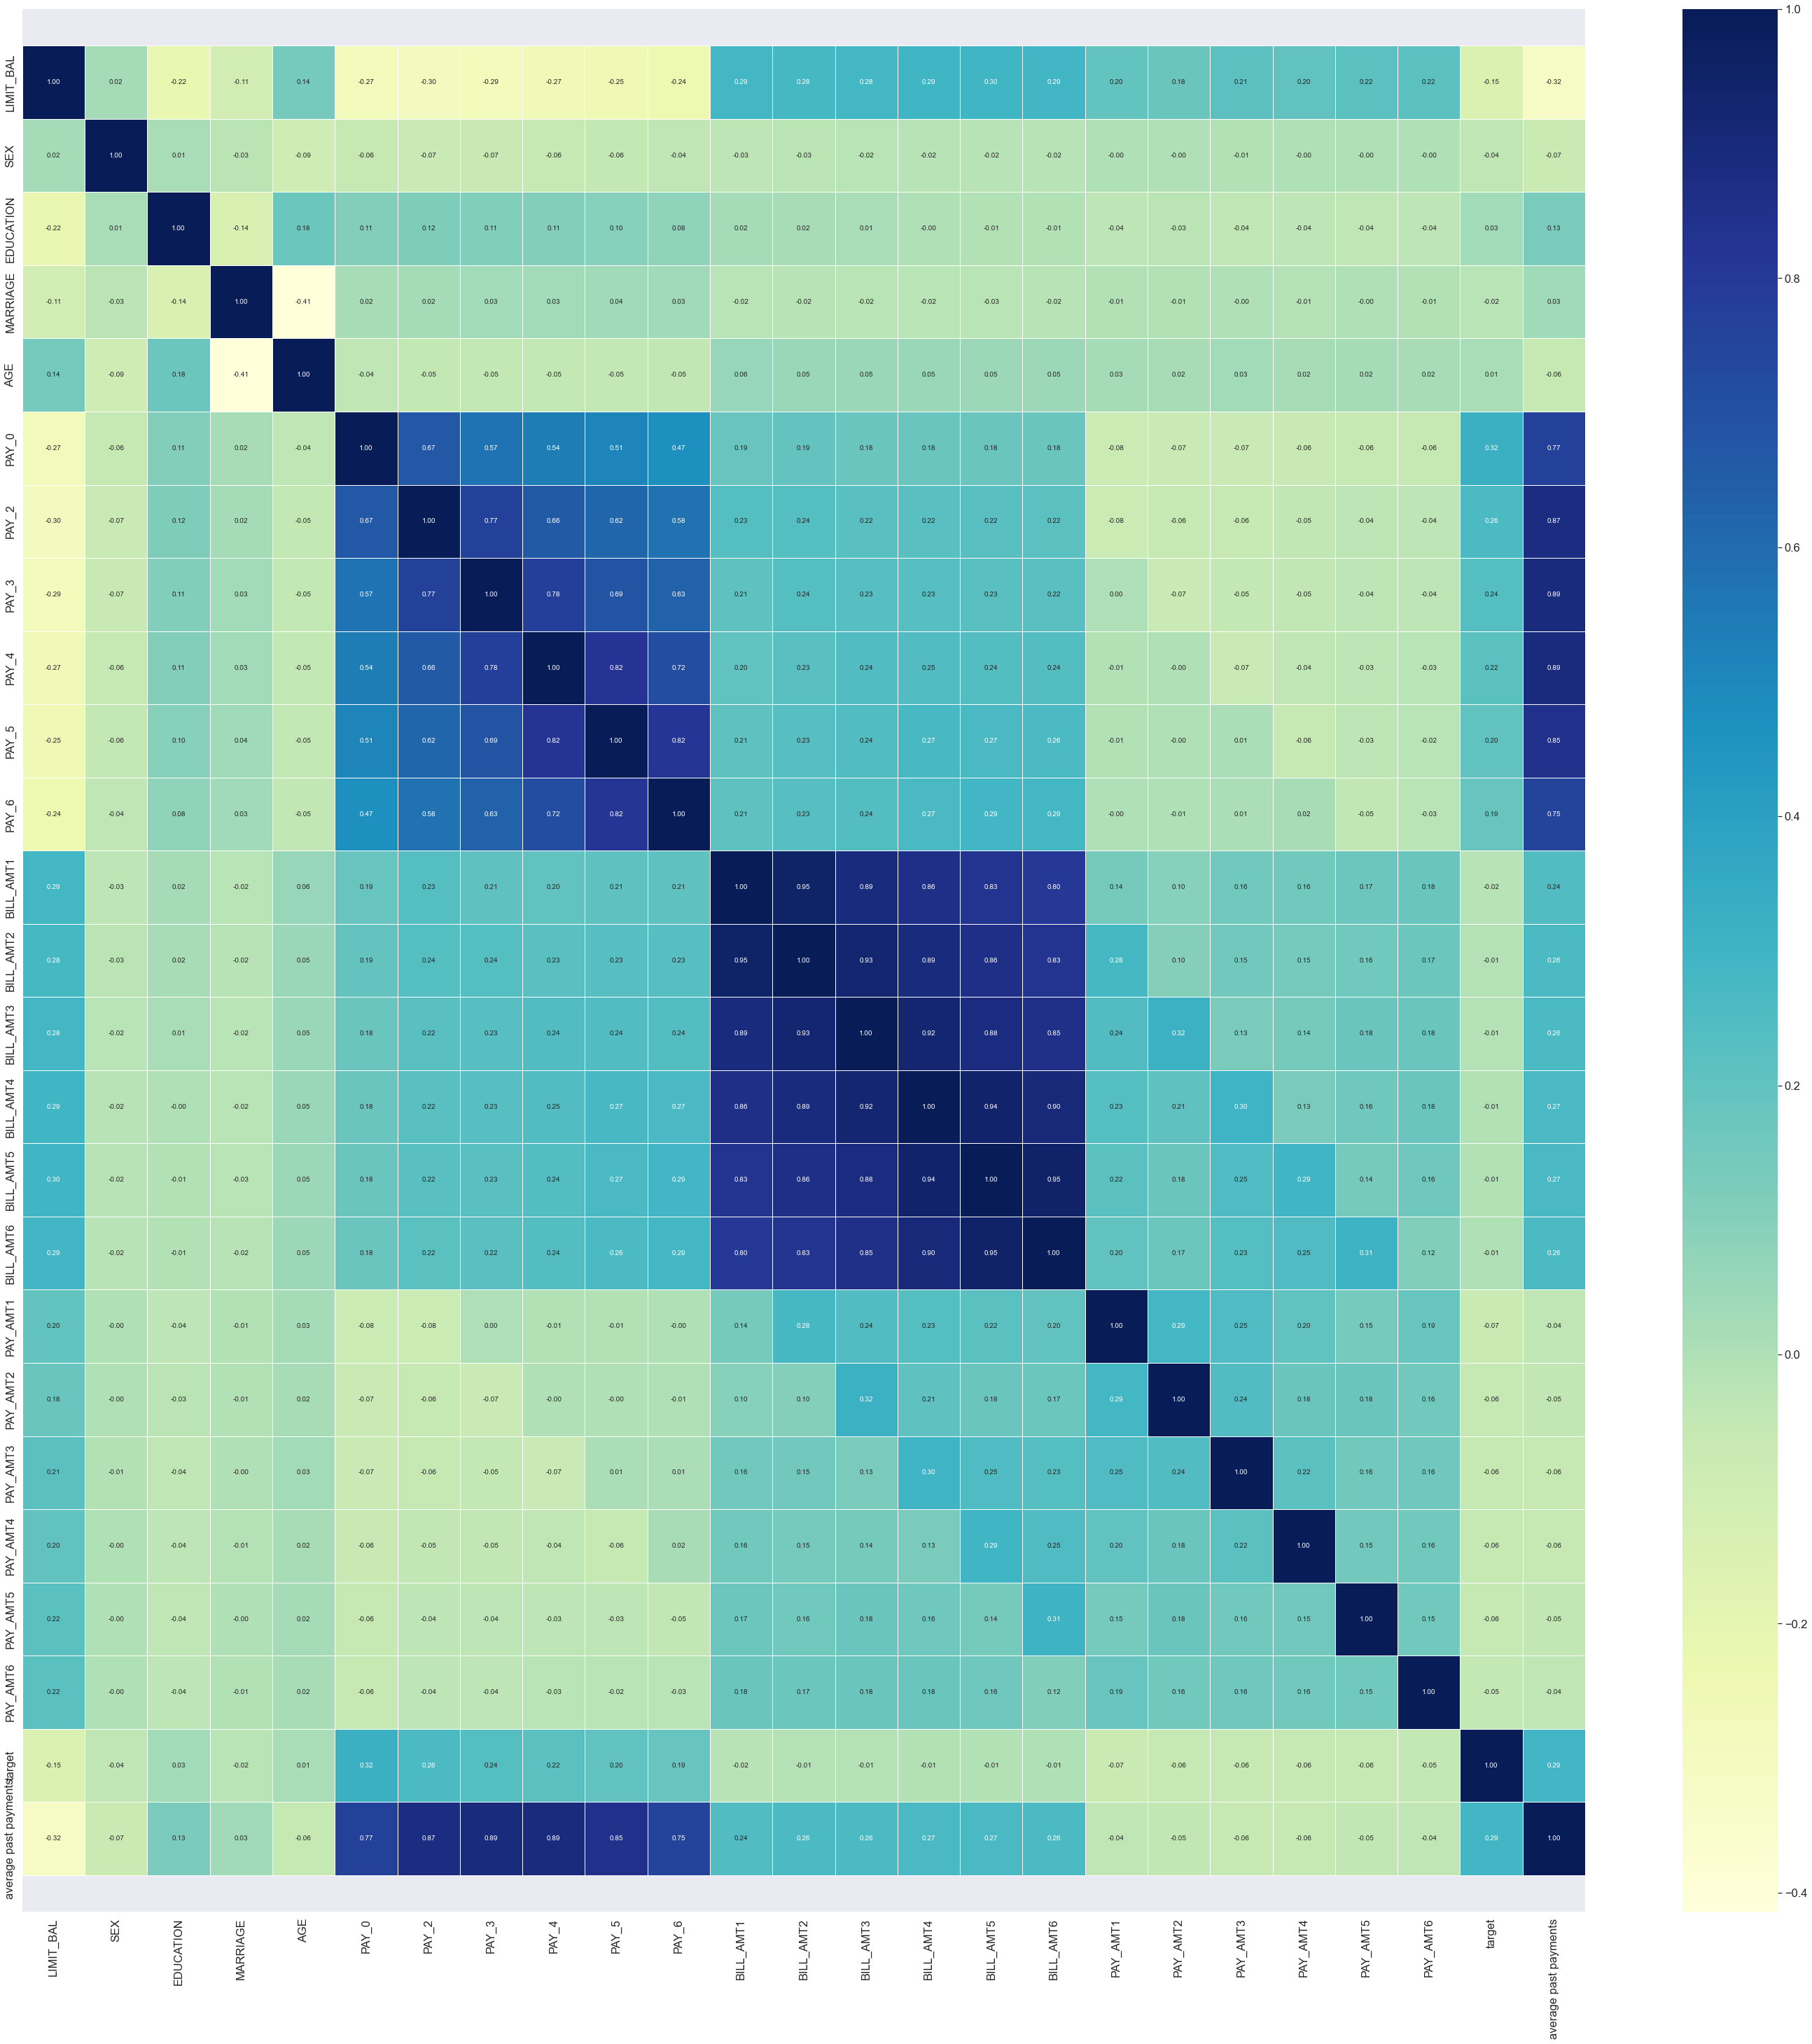

In [223]:
corr_matrix = perf_dataset.corr()
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<h3> Displaying feature matrix and labeled data

In [224]:
#Creating features matrix and labels
X = perf_dataset.drop("target", axis=1)
y = perf_dataset["target"]

In [225]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,average past payments
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0.000000
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0.166667
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.000000
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.000000
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,-0.333333


In [226]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

Checking the distribution of y component

<AxesSubplot:>

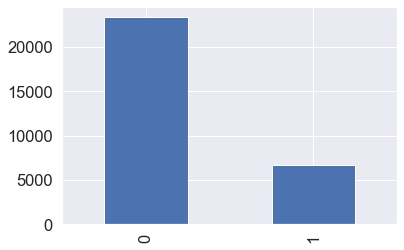

In [227]:
y.value_counts().plot(kind='bar')

Defaulter's are only 1/3rd of the population

### Splitting Data into Training and Testing Set

In [228]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

### Fitting and Scoring the following models

We're going to try 3 different machine learning models:
<br><ul>
<li>Logistic Regression
<li>K-Nearest Neighbours Classifier
<li>Random Forest Classifier

In [229]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [230]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7811666666666667,
 'KNN': 0.7561666666666667,
 'Random Forest': 0.8181666666666667}

Plotting the performance of each model

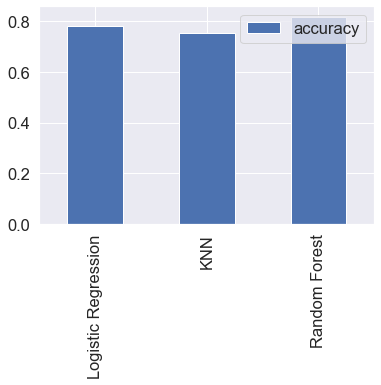

In [231]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Let's evaluate the models using different metrics. 

<b>Let's look at the following:</b>
<ol>
<li>Hypyterparameter tuning
<li>Feature importance
<li>Confusion matrix
<li>Cross-validation
<li>Precision
<li>Recall
<li>F1 score
<li>Classification report
<li>ROC curve
<li>Area under the curve (AUC)
</ol>

### Tuning KNN manually

Varying the n_neighbors parameters for KNN model

In [232]:
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 30)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [233]:
train_scores

[0.9994166666666666,
 0.8425416666666666,
 0.84425,
 0.81625,
 0.8161666666666667,
 0.8039583333333333,
 0.80375,
 0.7980416666666666,
 0.79975,
 0.7939583333333333,
 0.7950833333333334,
 0.7920833333333334,
 0.7927083333333333,
 0.7905416666666667,
 0.791375,
 0.7899583333333333,
 0.7899166666666667,
 0.7887083333333333,
 0.7895,
 0.7889166666666667,
 0.7889166666666667,
 0.7872083333333333,
 0.7870416666666666,
 0.7865833333333333,
 0.7864166666666667,
 0.785375,
 0.7850833333333334,
 0.784875,
 0.7847083333333333]

In [234]:
test_scores

[0.691,
 0.7641666666666667,
 0.7365,
 0.765,
 0.7561666666666667,
 0.7676666666666667,
 0.7576666666666667,
 0.7718333333333334,
 0.7693333333333333,
 0.7761666666666667,
 0.7736666666666666,
 0.7755,
 0.773,
 0.7763333333333333,
 0.7731666666666667,
 0.779,
 0.7763333333333333,
 0.779,
 0.7766666666666666,
 0.7801666666666667,
 0.7798333333333334,
 0.7806666666666666,
 0.7793333333333333,
 0.7795,
 0.7786666666666666,
 0.779,
 0.778,
 0.7805,
 0.7806666666666666]

### Tuning Logistic Regression and RandomForestClassifier [RandomizedSearchCV]

Tuning using RandomizedSearchCV

In [235]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [25, 30, 35, 20, 40],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV for Logistic Regression



In [236]:

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [237]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [238]:
rs_log_reg.score(X_test, y_test)

0.7811666666666667

Our earlier logistic regression score was 78.11%. Thus, no significant increment even after performing hyperparameter tuning (78.47%). 

In [239]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[4687    0]
 [1313    0]]


### Let's tune using RandomizedSearchCV for RandomForestClassifier


In [240]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [25, 30, 35, 20, 40],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [241]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [242]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8218333333333333

This looks good. Our RandomForestClassifier recieved a minor increment from hyperparameter tuning.

Evaluting our tuned machine learning classifier, beyond accuracy:    
1. ROC curve and AUC score
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

To make comparisons and evaluate our trained model, first we need to make predictions.

### Hyperparameter using GridSearchCV

In [243]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [244]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 2807.2162039411755, 'solver': 'liblinear'}

In [245]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7811666666666667

Even after making use of GridSearchCV we recieve no boost within Logistic Regression model. 

Therefore, we should be making use of only RandomForestClassifier() as it provides an accuracy of 82%. Let's check performance of these models based on other parameters.

### Evaluating the Performance of KNN Model

In [246]:
knn_predict = knn.predict(X_test)

Maximum KNN score on the test data: 78.07%


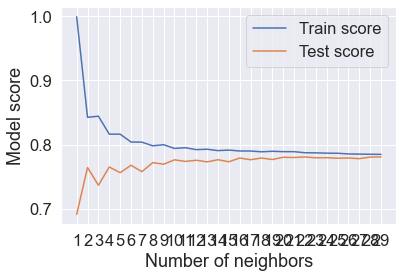

In [247]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 30, 1.0))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [248]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4687
           1       0.49      0.09      0.16      1313

    accuracy                           0.78      6000
   macro avg       0.64      0.53      0.52      6000
weighted avg       0.73      0.78      0.72      6000



Best results at n_neighbors = 30

By increasing n_neighbors we were able to increase the initial score of KNN model from 75.61% to 78.07%.

With n_neighbors hyperparameter set at 30 (optimal value) KNN accuray does not overcome accuracy provided by Random Forest Calssifier Model. 

As a result, we can shift our attention towards Regression and RandomForestClassifier

### Evaluating the RandomForestClassifier Model

In [249]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)

In [250]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [251]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
2210     0
14144    1
23108    0
25703    0
29171    0
Name: target, Length: 6000, dtype: int64

/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


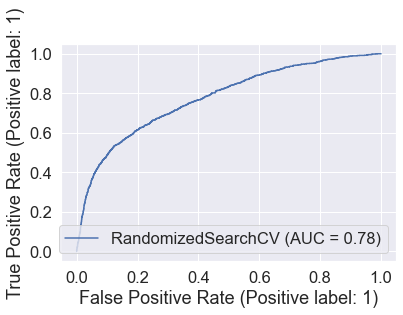

In [252]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test)

As a rule of thumb, an AUC above 0.85 means high classification accuracy, one between 0.75 and 0.85 moderate accuracy, and one less than 0.75 low accuracy

In [253]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[4451,  236],
       [ 833,  480]])

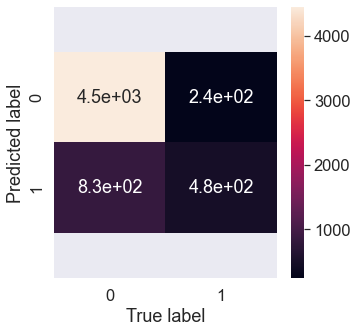

In [254]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test,y_preds)

In [255]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Clearly, the f1-score, recall and precision are significantly low.

Other than classification we can also manually check these meterics through cross-validation. Like below: 

In [256]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [257]:
# Create a new classifier with best parameters
rfc = RandomForestClassifier(n_estimators=710,
                             min_samples_split=16,
                             min_samples_leaf=3,
                             max_depth=20)

In [258]:
# Cross-validated accuracy
rfc_acc = cross_val_score(rfc,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

rfc_acc

array([0.80566667, 0.80733333, 0.82016667, 0.8305    , 0.824     ])

In [259]:
rfc_acc = np.mean(rfc_acc)
rfc_acc

0.8175333333333332

In [260]:
#Cross-validated precision
rfc_precision = cross_val_score(rfc,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
rfc_precision=np.mean(rfc_precision)
rfc_precision

0.665086117690626

In [261]:
# Cross-validated recall
rfc_recall = cross_val_score(rfc,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
rfc_recall = np.mean(rfc_recall)
rfc_recall

0.36151739588345844

In [262]:
# Cross-validated f1-score
rfc_f1 = cross_val_score(rfc,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
rfc_f1 = np.mean(rfc_f1)
rfc_f1

0.46795207964096164

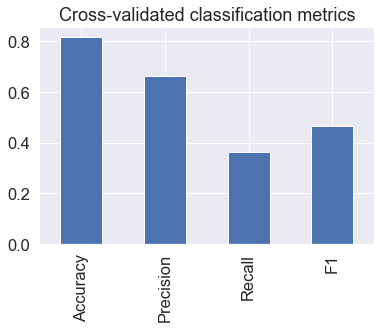

In [263]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": rfc_acc,
                           "Precision": rfc_precision,
                           "Recall": rfc_recall,
                           "F1": rfc_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Clearly, our models Recall, F1 and Precision shows the drawbacks of our model. 

### Evaluating Logistic Regression

In [264]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [265]:
lr = LogisticRegression(solver='liblinear',
                       C=78.47599703514607)

In [266]:
lr.fit(X_train, y_train)

LogisticRegression(C=78.47599703514607, solver='liblinear')

In [267]:
predictions = lr.predict(X_test)

In [268]:
score = lr.score(X_test, y_test)
score

0.7811666666666667

In [269]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[4687    0]
 [1313    0]]


In [270]:
lr_acc = cross_val_score(lr,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
lr_acc

array([0.7785    , 0.77883333, 0.77883333, 0.77883333, 0.77883333])

Let's take average of these parameters.

In [271]:
lr_acc = np.mean(lr_acc)
lr_acc

0.7787666666666667

In [272]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

The following model does not do a good job at predicting target values 1.

In [273]:
print("LR: " + classification_report(y_test, predictions)),
print("RFC: " + classification_report(y_test,y_preds)),
print("KNN: " + classification_report(y_test,knn_predict))

LR:               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

RFC:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

KNN:               precision    recall  f1-score   support

           0       0.79      0.97      0.87      4687
           1       0.49      0.09      0.16      1313

    accuracy                           0.78      6000
   macro avg       0.64      0.53      0.52      6000
weighted avg       0.73      0.78      0.72      6000



/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Based on above metrics, RFC performs the best follwed by K-nearest neighbors model. With the following parameters:

In [274]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 20}